<a href="https://colab.research.google.com/github/dubverse-ai/whisperdemo/blob/main/OPENAI_whisper_demo_youtube_%3E_english_SRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This demo takes in any youtube video and converts it into English SRT

 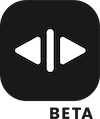

Powered by [dubverse.ai](https://dubverse.ai/) where we are working to make every video go multi-lingual

In [ ]:
#@title INSTALL DEPENDENCIES
!pip install --quiet ffmpeg-python git+https://github.com/openai/whisper.git > /dev/null --q
!pip3 install gradio --q
!pip3 install vtt_to_srt3 --q
!sudo curl -L https://yt-dl.org/downloads/latest/youtube-dl -o /usr/local/bin/youtube-dl
!sudo chmod a+rx /usr/local/bin/youtube-dl

In [ ]:
#@title Launch the APP

import gradio as gr
import os
import subprocess

from vtt_to_srt.vtt_to_srt import vtt_to_srt


def greet(youtube_link,source_language):
    if(os.exists('audio.m4a')):
      os.remove('audio.m4a')
      os.remove('audio.m4a.vtt')
      os.remove('audio.m4a.srt')
    print(1)
    subprocess.run('youtube-dl -f bestaudio '+str(youtube_link)+' -o "audio.m4a"',shell=True)
    print(2)
    subprocess.run('whisper audio.m4a --language '+str(source_language)+' --task translate',shell=True)
    print(3)
    path = '/content/audio.m4a.vtt'
    vtt_to_srt(path)
    with open('/content/audio.m4a.srt','r') as file:
      data=file.read()
    return data,'/content/audio.m4a.srt'

demo = gr.Interface(
    fn=greet,
    inputs=[gr.Textbox(lines=2, placeholder="paste youtube link here"),gr.Textbox(lines=2, placeholder="enter the source language (Marathi,Hindi,Spanish...etc)")],
    outputs=[gr.Textbox(label="SRT/SUBS"),gr.File(label="Download the SRT/SUBS")]
)
demo.launch(debug=True)